# OpenCV
## OpenCVとは

　画像処理を主としたPythonのライブラリです。

- 機能
  - 画像処理(幾何変換、色変換、エッジ検出、ヒストグラム、ラベリングなど)
  - 画像解析(輪郭処理、パターン認識、物体追跡など)
  - 機械学習(単純ベイズ分類、k近傍法、サポートベクターマシン、決定木など)
- 対応言語
  - C、C++、Java、Python、MATLAB
- 対応プラットフォーム
  - Unix系OS(Linux、FreeBSD)、Windows、Android、iOS

## OpenCVの簡単な使い方

Python では 'cv2' モジュールをインポートします。

In [1]:
import cv2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 黒いキャンバスを作る。

　まず3次元のndarray(numpy配列)を作ります。これがキャンバスになります。cv2.cvtColorで色をセットします。

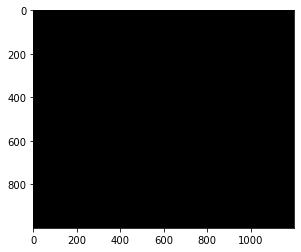

In [2]:
img0 = np.zeros((1000,1200,3), np.uint8)  # (縦、横、色)

img = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

(※) OpenCV の色の順番はBGR(Blue, Green, Redの順)。

MATPLOTLIB の色表現は RGB のため、OpenCVで作成した画像を MATPLOT で出力するには、cv2.cvtColor(img, cv2.COLOR_BGR2RGB) で色表現の変換が必要。

(※) 画像を別ウインドウで表示する cv2.imshow() もある(色変換は不要)。

In [3]:
# 以降のスクリプトで使うために、サイズ変更、色変換を含めた描画用関数を作っておく
def get_ax(row, col, figsize=None):
    if figsize is None:
        figsize = (col * 5, row * 5)
    fig = plt.figure(figsize=figsize)
    ax = [fig.add_subplot(row, col, n) for n in range(1, row * col + 1)]
    return ax

def my_imshow(img, ax=None, title=None):
    if ax is None:
        ax = get_ax(1, 1)[0]
    if not title is None:
        ax.set_title(title)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#    plt.show()

### 青いキャンバスを作る。

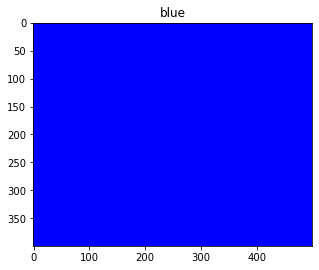

In [4]:
img = np.zeros((400,500,3), np.uint8)
img[:,:,0] = 255
img[:,:,1] = 0
img[:,:,2] = 0
#一行で書くなら、
#img[:,:] = [255, 0, 0]   

my_imshow(img, title='blue')

### 真っ白のキャンバスに円を描く

　円は、cv2.circle()を使います。中心、半径、色、線幅などを指定できます。

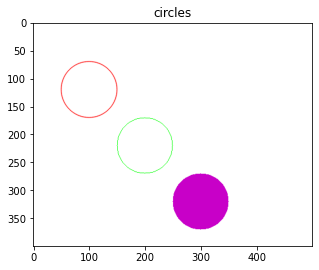

In [5]:
img = np.zeros((400,500,3), np.uint8)
img[:,:] = [255, 255, 255]

# cv2.circle(image, 中心, 半径, 色, 線幅, 線種)
#   負の線幅は内側塗りつぶし
#   線種: cv2.LINE_8(8連結)、cv2.LINE_4(4連結)、cv2.LINE_AA(アンチエイリアス)
cv2.circle(img, (100, 120), 50, (0, 0, 255), 1, cv2.LINE_AA)
cv2.circle(img, (200, 220), 50, (0, 255, 0), 1)
cv2.circle(img, (300, 320), 50, (200, 0, 200), -1)

my_imshow(img, title='circles')

### 直線や長方形やテキスト

　直線、長方形，テキストはそれぞれcv2.line()、cv2.rectangle()、cv2.putText()を使います。

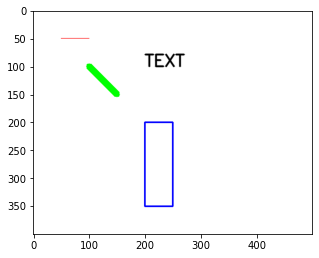

In [6]:
img = np.zeros((400,500,3), np.uint8)
img[:,:] = [255, 255, 255]

# cv2.line(image, 始点, 終点, 色, 線幅, 線種)
cv2.line(img, (50, 50), (100, 50), (0, 0, 255), 1)
cv2.line(img, (100, 100), (150, 150), (0, 255, 0), 10)

# cv2.rectangle(image, 始点, 終点, 色, 線幅, 線種)
cv2.rectangle(img, (200, 200), (250, 350), (255, 0, 0), 2)

# cv2.putText(image, テキスト, 左下点, フォント種, フォントスケール, 色, 線幅, 線種)
cv2.putText(img, 'TEXT', (200, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

my_imshow(img)

### 画像ファイルの読み込み

　画像ファイルの読み込みには、cv2.imread()を使います。画像のフォーマットはファイル名から自動判定されます。

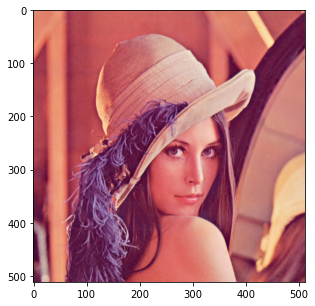

In [7]:
# cv2.imread(ファイル名)
lena_img = cv2.imread('Lenna.png')
my_imshow(lena_img)

### 画像の書き出し

　画像のファイルへの書き出しは、cv2.imwrite()を使います。ファイル名の拡張子で出力する画像ファイルのフォーマットが決まります。

True

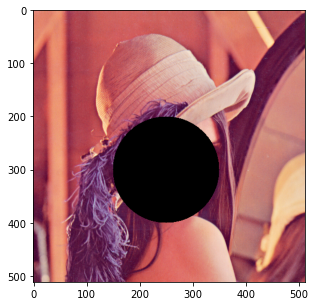

In [8]:
# 読みだした画像に落書き
cv2.circle(lena_img, (250, 300), 100, (0, 0, 0), -1)
my_imshow(lena_img)

# cv2.imwrite(ファイル名, image)
cv2.imwrite('modified_Lenna.png', img)

## アフィン変換

　アフィン変換とは、$ X $ を元の画像の座標ベクトル、$ Y $ を変換後の座標ベクトルとして、

$$
Y = AX + B 　　(A は行列、B はベクトル)
$$

で表される変換のことです。

　2次元画像の場合は
$$
\left(\begin{array}{c}
  x' \\
  y' 
\end{array}\right)
=
\left(\begin{array}{ccc}
  a_{00} & a_{01}\\
  a_{10} & a_{11}\\
\end{array}\right)
\left(\begin{array}{c}
  x \\
  y \\
\end{array}\right)+
\left(\begin{array}{c}
  b_{0} \\
  b_{1} \\
\end{array}\right)
$$

 または
$$
\left(\begin{array}{c}
  x' \\
  y'
\end{array}\right)
=
\left(\begin{array}{ccc}
  a_{00} & a_{01} & b_{0} \\
  a_{10} & a_{11} & b_{1} \\
\end{array}\right)
\left(\begin{array}{c}
  x \\
  y \\
  1
\end{array}\right)
$$
と書くことができます。

　具体的には

- 並行移動
- 反転
- サイズ変更
- 回転
- 剪断

などがアフィン変換に含まれます。

### 反転

画像の上下、左右の反転については、cv2.flip()を使います。

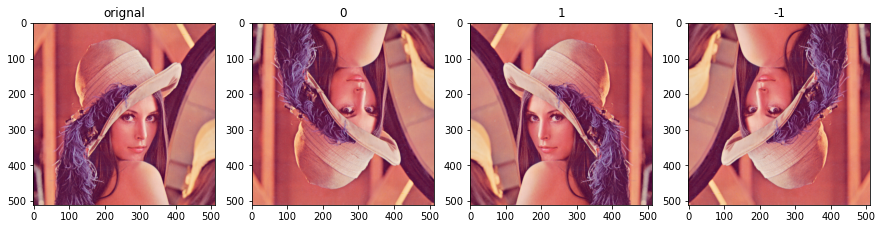

In [9]:
lena_img = cv2.imread('Lenna.png')

# cv2.flip(image, 方向)
#  方向: 0(上下反転)、　正値(左右反転)、　負値(上下、左右反転)
img2 = cv2.flip(lena_img, 0)
img3 = cv2.flip(lena_img, 1)
img4 = cv2.flip(lena_img, -1)

ax = get_ax(1, 4, (15, 5))
my_imshow(lena_img, ax[0], title='orignal')
my_imshow(img2, ax[1], title='0')
my_imshow(img3, ax[2], title='1')
my_imshow(img4, ax[3], title='-1')

### サイズ変更

cv2.resize()を使います。

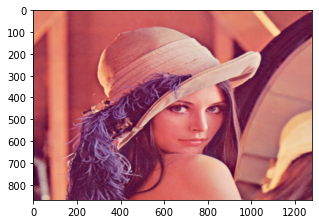

In [30]:
# shape[0]: 高さ、　shape[1]: 幅
height = lena_img.shape[0]
width = lena_img.shape[1]

# cv2.resize(image, 変換後のサイズ)
img2 = cv2.resize(lena_img, (int(width * 2.5), int(height * 1.7)))
my_imshow(img2)

### 回転

90度単位の回転は、cv2.rotate() を使用します。

任意角度の回転は、一般のアフィン変換(後述)によって行います。

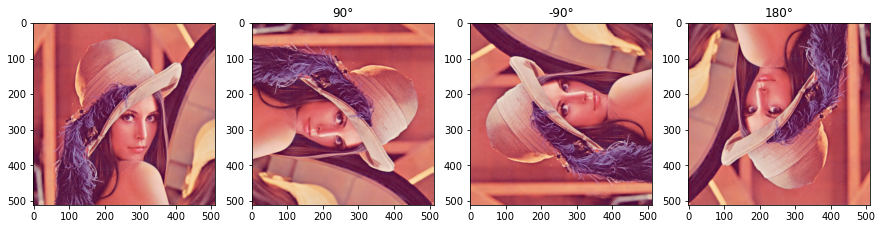

In [11]:
# cv2.rotate(image, 回転角度)
#  回転角度：
#    cv2.ROTATE_90_CLOCKWISE: 時計回りに90度
#    cv2.ROTATE_90_COUNTERCLOCKWISE: 反時計回りに90度
#    cv2.ROTATE_180: 180度

img2 = cv2.rotate(lena_img, cv2.ROTATE_90_CLOCKWISE)
img3 = cv2.rotate(lena_img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img4 = cv2.rotate(lena_img, cv2.ROTATE_180)

ax = get_ax(1, 4, (15, 7))

my_imshow(lena_img, ax[0])
my_imshow(img2, ax[1], '90°')
my_imshow(img3, ax[2], '-90°')
my_imshow(img4, ax[3], '180°')

### 一般のアフィン変換

2次元のアフィン変換の一般式、

$$
\left(\begin{array}{c}
  x' \\
  y'
\end{array}\right)
=
\left(\begin{array}{ccc}
  a_{00} & a_{01} & b_{0} \\
  a_{10} & a_{11} & b_{1} \\
\end{array}\right)
\left(\begin{array}{c}
  x \\
  y \\
  1
\end{array}\right)
$$
の変換行列、
$$
\left(\begin{array}{ccc}
  a_{00} & a_{01} & b_{0} \\
  a_{10} & a_{11} & b_{1} \\
\end{array}\right)
$$
を np.array にして cv2.warpAffine() の引数として与えると、アフィン変換ができます。

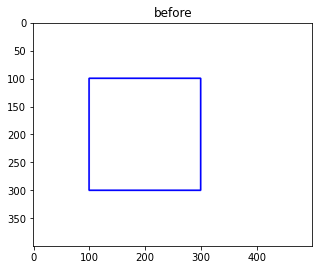

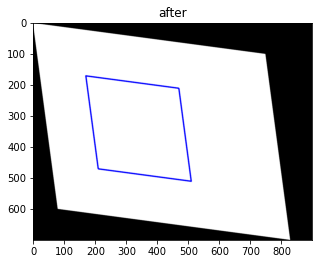

In [12]:
img = np.zeros((400,500,3), np.uint8)
img[:,:] = [255, 255, 255]

cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 0), 2)

matrix = np.array([[1.5, 0.2, 0.], 
                   [0.2, 1.5, 0.]])
# cv2.warpAffine(image, 変換行列, 変換後のサイズ)
img2 = cv2.warpAffine(img, matrix, (900, 700))

my_imshow(img, title='before')
my_imshow(img2, title='after')


### 任意角度の回転

回転の中心座標を( α , β )、回転角度を θ とすると、変換行列は
$$
\left(\begin{array}{ccc}
  \cos \theta & -\sin \theta & \alpha \left(1 -\cos \theta \right) +\beta \sin \theta \\
  \sin \theta & \cos \theta & -\alpha \sin \theta +\beta \left(1 -\cos \theta \right)\\
\end{array}\right)
$$
と書けます。

　これを cv2.warpAffine() に与えれば回転ができます。ただし回転については cv2.getRotationMaterix2d という関数を使って簡単に書くこともできます。


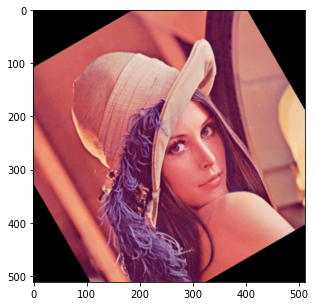

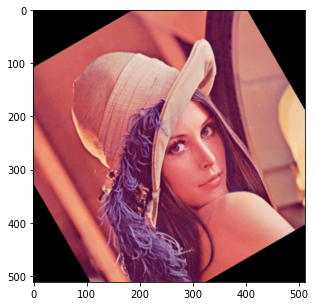

In [13]:
height = lena_img.shape[0]
width = lena_img.shape[1]
center_x = int(width/2)
center_y = int(height/2)

deg = 30    # 反時計回りの回転角度(°) 
# getRotationMatrix2Dで変換行列を作る
# cv2.getRotationMatrix2D(回転の中心, 回転角度(deg), スケーリング)
matrix1 = cv2.getRotationMatrix2D((center_x, center_y), deg, 1.0)
img1 = cv2.warpAffine(lena_img, matrix1, (width, height))

my_imshow(img1)

# (参考)三角関数で変換行列を作る
rad = -1 * np.radians(deg)  # ラジアンに変換。
                            # -1倍して、時計回りの回転角度にする(縦軸が普通の座標とは逆向きなので)。
matrix2 = np.array([[np.cos(rad), -1 * np.sin(rad), center_x * (1. - np.cos(rad)) + center_y * np.sin(rad)],
                    [np.sin(rad), np.cos(rad), -1 * center_x * np.sin(rad) + center_y * (1. - np.cos(rad))]])
img2 = cv2.warpAffine(lena_img, matrix2, (width, height))

my_imshow(img2)

### トリミング

トリミングは画像データに対し配列スライスすることで行います。


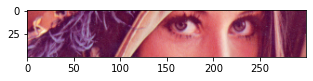

In [14]:
img2 = lena_img[250:300, 100:400, :]  # [y, x, 色]

my_imshow(img2)

## 色の処理

この章では画像の色の変換について扱います。

### 色の変換

　色空間の変換は、cv2.cvtColor() の第2引数で指定します。

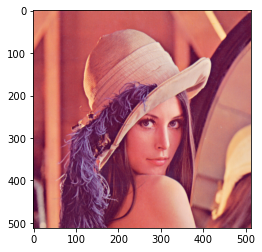

In [15]:
lena_img = cv2.imread('Lenna.png')

#matplotlib 用に BGR->RGB変換
img2 = cv2.cvtColor(lena_img, cv2.COLOR_BGR2RGB)

plt.imshow(img2)

### グレイスケール化

cv2.cvtColor() を使います。

cv2.imread() で読み込んだ画像はBGR形式なので、cv2.cvtColor()の引数として、cv2.COLOR_BGR2GRAY を指定します。

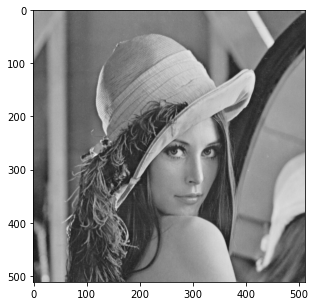

In [16]:
lena_gray = cv2.cvtColor(lena_img, cv2.COLOR_BGR2GRAY)

my_imshow(lena_gray)

### 輝度平滑化

　輝度平滑化とは、輝度の変化を滑らかにする処理です。ノイズなどの除去に使います。

　輝度平滑化には、cv2.equalizeHist()を使います。入力はグレイスケールでなければなりません。


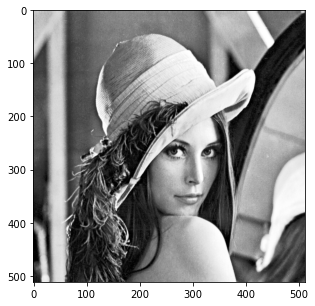

In [17]:
img2 = cv2.equalizeHist(lena_gray)

my_imshow(img2)

### スレッショルド処理

　スレッショルド処理(閾値処理)とは、ある閾値に対する大小で画素の値を変える処理です。

　注目したい物だけを強調する処理などに使います。


(0.0, 1.0, 0.0, 1.0)

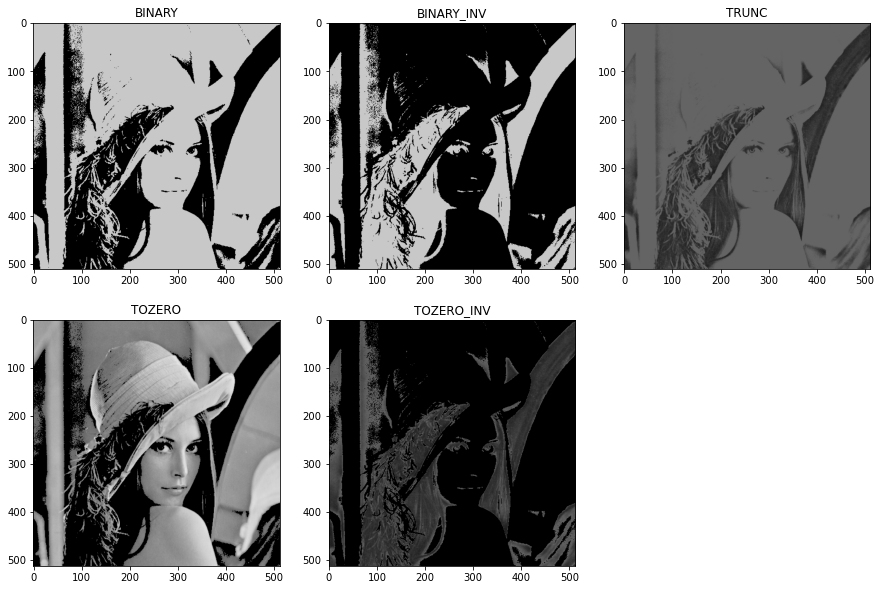

In [18]:
# cv2.threshold(image, 閾値, 固定値, 処理)
#  cv2.THRESH_BINARY: 閾値を超える画素を固定値に、閾値以下の画素を0(黒)に
th, img2 = cv2.threshold(lena_gray, 100, 200, cv2.THRESH_BINARY)
#  cv2.THRESH_BINARY_INV: 閾値を超える画素を0(黒)に、閾値以下の画素を固定値に
th, img3 = cv2.threshold(lena_gray, 100, 200, cv2.THRESH_BINARY_INV)
#  cv2.THRESH_TRUNC: 閾値を超える画素を固定値に、閾値以下の画素はそのまま
th, img4 = cv2.threshold(lena_gray, 100, 200, cv2.THRESH_TRUNC)
#  cv2.THRESH_TOZERO: 閾値を超える画素はそのまま、閾値以下の画素を0(黒)に
th, img5 = cv2.threshold(lena_gray, 100, None, cv2.THRESH_TOZERO)
#  cv2.THRESH_TOZERO_INV: 閾値を超える画素を0(黒)に、閾値以下の画素はそのまま
th, img6 = cv2.threshold(lena_gray, 100, None, cv2.THRESH_TOZERO_INV)

ax = get_ax(2, 3)

my_imshow(img2, ax[0], 'BINARY')
my_imshow(img3, ax[1], 'BINARY_INV')
my_imshow(img4, ax[2], 'TRUNC')
my_imshow(img5, ax[3], 'TOZERO')
my_imshow(img6, ax[4], 'TOZERO_INV')
ax[5].axis('off')

### アダプティブスレッショルド処理

　アダプティブスレッショルド処理(適応的閾値処理)は、一つひとつの画素に対し、周囲の画素の値から閾値を求め、閾値処理を行います。

　単純なスレッショルド処理より、急激な輝度の変化を抑えた画像が得られます。

　cv2.adaptiveThreshold()を使います。

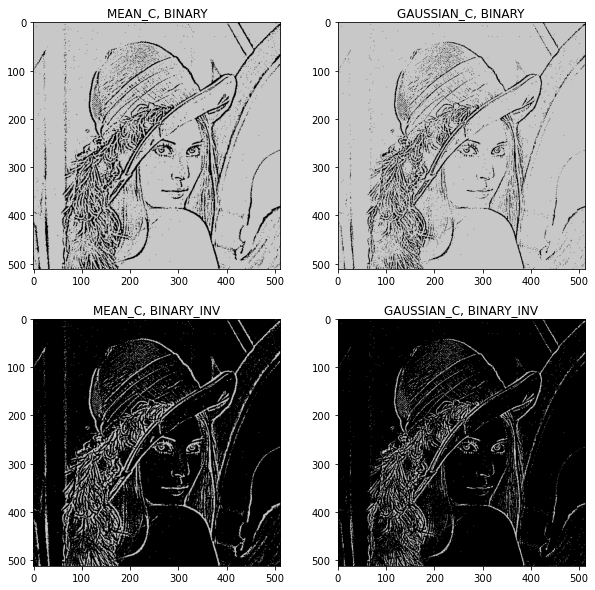

In [19]:
# cv2.adaptiveThresholdthreshold(image, 固定値, 閾値を求める方法、処理, 近傍領域サイズ, 閾値のマージン)
#  閾値を求める方法: v2.ADAPTIVE_THRESH_MEAN_C(平均）,cv2.ADAPTIVE_THRESH_GAUSSIAN_C(加重平均)
#  処理: cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV
img2 = cv2.adaptiveThreshold(lena_gray, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 8)
img3 = cv2.adaptiveThreshold(lena_gray, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 8)

img4 = cv2.adaptiveThreshold(lena_gray, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 8)
img5 = cv2.adaptiveThreshold(lena_gray, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 8)

ax = get_ax(2, 2)

my_imshow(img2, ax[0], 'MEAN_C, BINARY')
my_imshow(img3, ax[1], 'GAUSSIAN_C, BINARY')
my_imshow(img4, ax[2], 'MEAN_C, BINARY_INV')
my_imshow(img5, ax[3], 'GAUSSIAN_C, BINARY_INV')

### 色成分の分離

　カラー画像の B, R, G 成分を分離するには、cv2.split() を使います。

　分離後の画像をグレースケールとして表示させると、より強い色成分がより白っぽい画像になります。

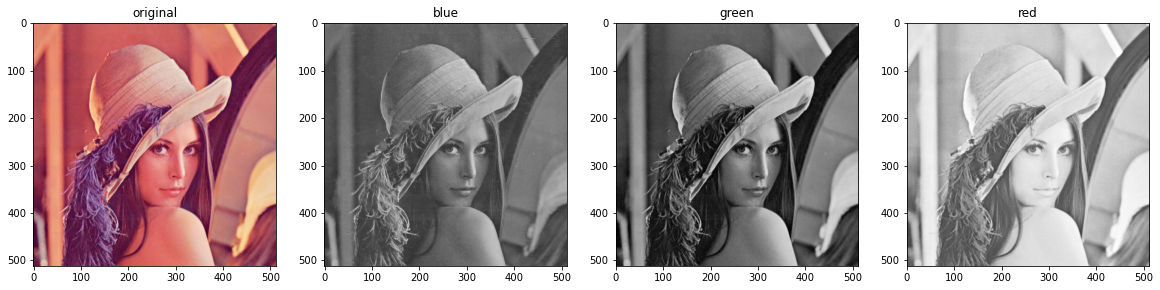

In [20]:
bgr = cv2.split(lena_img)

blue_img = bgr[0]
green_img = bgr[1]
red_img = bgr[2]

ax = get_ax(1, 4)

my_imshow(lena_img, ax[0], 'original')
my_imshow(blue_img, ax[1], 'blue')
my_imshow(green_img, ax[2], 'green')
my_imshow(red_img, ax[3], 'red')

## フィルタ処理

　簡単なフィルタを学びます。


### 色反転

cv2.bitwise_not() で色を反転します。

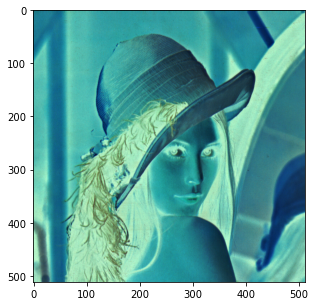

In [21]:
img2 = cv2.bitwise_not(lena_img)
my_imshow(img2)

### 平滑化

さまざまな平滑化処理を学びます。

- cv2.blur(): 単純なブラー処理(平滑化)
  
  指定したカーネル(領域)サイズ内の平均をとります。
 
- cv2.medianBlur(): メディアン処理
  
  指定したカーネル(領域)サイズ内の中央値をとります。
  
- cv2.GaussianBlur(): ガウシアン処理
  
  指定したカーネル(領域)サイズ内の値に対し、対象画素との距離に応じた重みを加味した平均をとります。

- cv2.boxFilter(): ボックスフィルタによる平滑化
  

(0.0, 1.0, 0.0, 1.0)

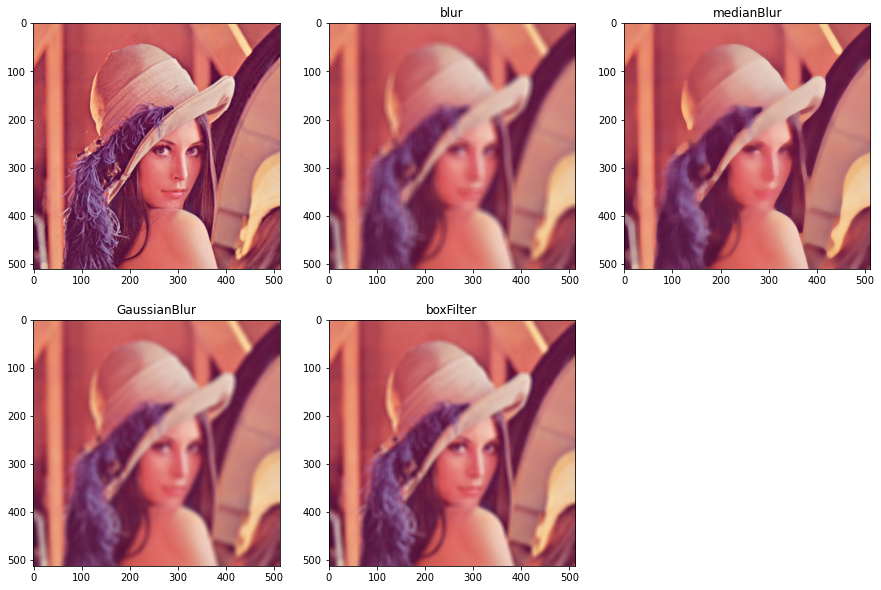

In [22]:
# cv2.blur(image, カーネルサイズ)
img2 = cv2.blur(lena_img, (15, 15))
# cv2.medianBlur(image, カーネルサイズ)
img3 = cv2.medianBlur(lena_img, 15)
# cv2.GaussianBlur(image, カーネルサイズ, ガウシアン標準偏差)
img4 = cv2.GaussianBlur(lena_img, (15, 15), 5)
# cv2.boxFilter(image, 出力データの型(-1で入力と同じ), カーネルサイズ
img5 = cv2.boxFilter(lena_img, -1, (10, 10))

ax = get_ax(2, 3)

my_imshow(lena_img, ax[0])
my_imshow(img2, ax[1], 'blur')
my_imshow(img3, ax[2], 'medianBlur')
my_imshow(img4, ax[3], 'GaussianBlur')
my_imshow(img5, ax[4], 'boxFilter')
ax[5].axis('off')

### エッジ検出

色々なエッジ検出。

- ラプラシアン処理
- Sobel処理
- Canny処理


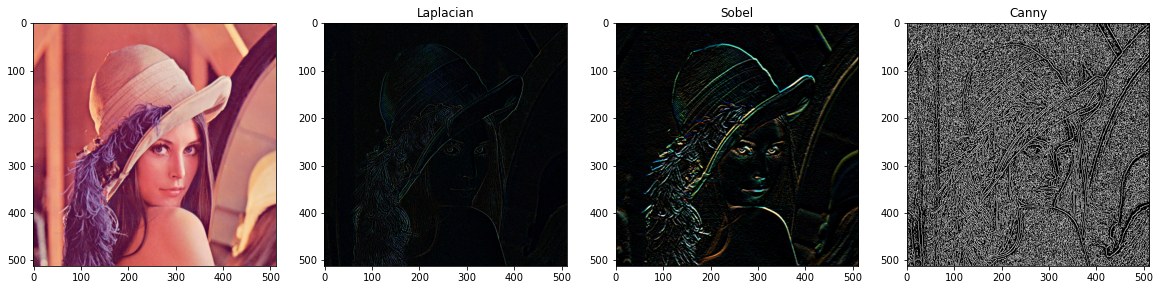

In [23]:
# cv2.Laplacian(image, 出力のデータ型(-1で入力と同じ))
img2 = cv2.Laplacian(lena_img, -1)

# cv2.Sobel(img, 出力のデータ型(-1で入力と同じ), x方向の微分次数, y方向の微分次数)
img3 = cv2.Sobel(lena_img, -1, 0, 1)

# cv2.Canny(img, 出力のデータ型(-1で入力と同じ), 閾値1, 閾値2)
img4 = cv2.Canny(lena_img, -1, 0, 1)

ax = get_ax(1, 4)
            
my_imshow(lena_img, ax[0])
my_imshow(img2, ax[1], 'Laplacian')
my_imshow(img3, ax[2], 'Sobel')
my_imshow(img4, ax[3], 'Canny')

### 画像膨張/収縮

　cv2.dilate() で画像の膨張、
cv2.erode() で画像の収縮を行います。2つを合わせて使うことで、ノイズ除去に使えます。

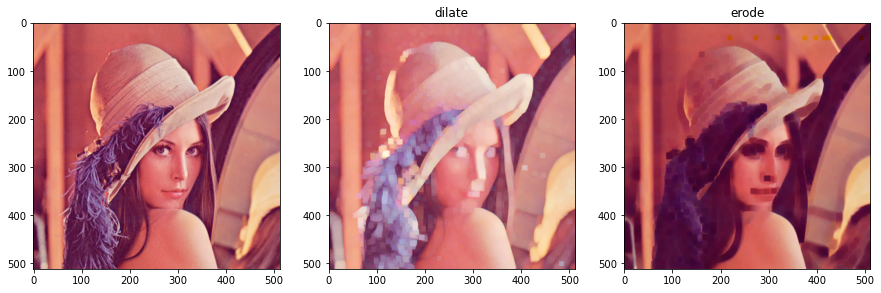

In [24]:
img2 = cv2.dilate(lena_img, np.ones((10, 10), np.uint8))
img3 = cv2.erode(lena_img, np.ones((10, 10), np.uint8))

ax = get_ax(1, 3)

my_imshow(lena_img, ax[0])
my_imshow(img2, ax[1], 'dilate')
my_imshow(img3, ax[2], 'erode')

## 画像の修正・修復

　画像中に含まれる不要な物体を除去したり、傷を修復する手法を学びます。


### 加算

　cv2.add()。
画像データに対し、スカラー値を加算することで画像を修正します。

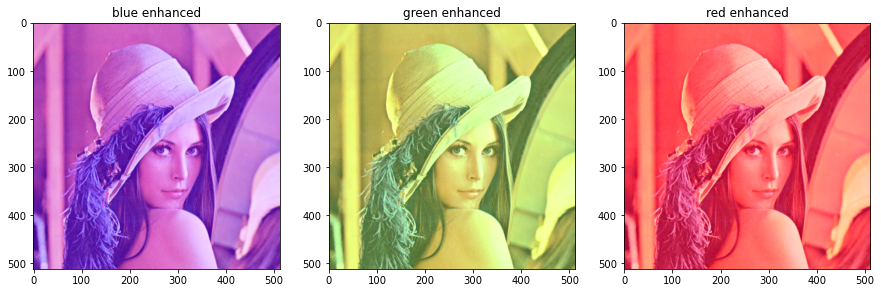

In [25]:
height = lena_img.shape[0]
width = lena_img.shape[1]

mask = np.zeros((height, width, 3), dtype = np.uint8)

# Blue を濃くする
mask[:,:] = [100, 0, 0]
img2 = cv2.add(lena_img, mask)

# Green を濃くする
mask[:,:] = [0, 100, 0]
img3 = cv2.add(lena_img, mask)

# Red を濃くする
mask[:,:] = [0, 0, 100]
img4 = cv2.add(lena_img, mask)

ax = get_ax(1, 3)

my_imshow(img2, ax[0], 'blue enhanced')
my_imshow(img3, ax[1], 'green enhanced')
my_imshow(img4, ax[2], 'red enhanced')

### 2つの画像の合成と差分抽出

　cv2.add() はスカラー値を足す以外に、同じサイズの画像の加算(合成)もできます。

　cv2.absdiff() は2つの画像の差分の絶対値を計算します。2つの画像の差異を取り出すことができます。

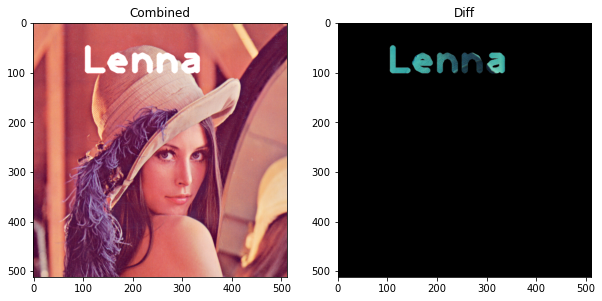

In [26]:
height = lena_img.shape[0]
width = lena_img.shape[1]

ax = get_ax(1, 2)

# 新しい画像を作る。
img = np.zeros((height, width,3), np.uint8)
img = cv2.putText(img, 'Lenna', (100, 100), cv2.FONT_HERSHEY_PLAIN, 5.0, (255,255,255), 10, cv2.LINE_AA)

# 画像を合成
img2 = cv2.add(lena_img, img)
my_imshow(img2, ax[0], 'Combined')

# もとの画像との差分抽出
img_diff = cv2.absdiff(lena_img, img2)
my_imshow(img_diff, ax[1], 'Diff')

### オブジェクト検出

OpenCV の github ( https://github.com/opencv/opencv/tree/master/data/haarcascades ) 
から様々なオブジェクト検出用の学習ファイルがダウンロードできます。また標準的な学習ファイルは OpenCV インストール時に同時にインストールされます。

ここでは、そのうちの haarcascade_frontalface_alt.xml を使って顔の検出を行ってみます。

1. cv2.CascadeClassifier() に学習ファイルを指定 

2. 戻り値のdetectMultiScale()メソッドで画像を処理 

3. 検出した部分の長方形(x, y, 幅, 高さ)のリストが得られます。

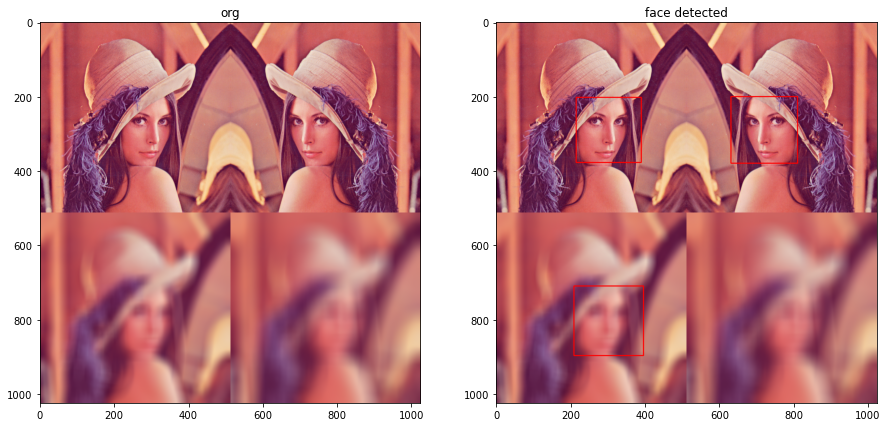

In [27]:
### 元の画像を作成
flip_img = cv2.flip(lena_img, 1)
upset_img = cv2.flip(lena_img, 0)
blur_img1 = cv2.blur(lena_img, (30, 30))
blur_img2 = cv2.blur(lena_img, (50, 50))

upper = np.hstack((lena_img, flip_img))
lower = np.hstack((blur_img1, blur_img2))
org_img = np.vstack((upper, lower))

### 顔検出
cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

facerect = cascade.detectMultiScale(org_img)

### 検出した部分に箱を書く
new_img = org_img.copy()
for rect in facerect:
    cv2.rectangle(new_img, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (0, 0, 255), 2)

ax = get_ax(1, 2, (15, 15))
my_imshow(org_img, ax[0], title='org')
my_imshow(new_img, ax[1], title='face detected')

### モザイク処理

前項で検出した顔にモザイクをかけてみます。

ここではモザイク処理を以下の手順で行います。

1. 該当する領域を切り出します。
1. 切り出した領域を縮小します(cv2.resize())。
1. 拡大した領域を元の大きさに拡大(cv2.resize())、ただし補間を行わないようなオプション引数(interpolation=cv2.INTER_NEAREST)を与えます。
1. 元の画像にはめ込みます。


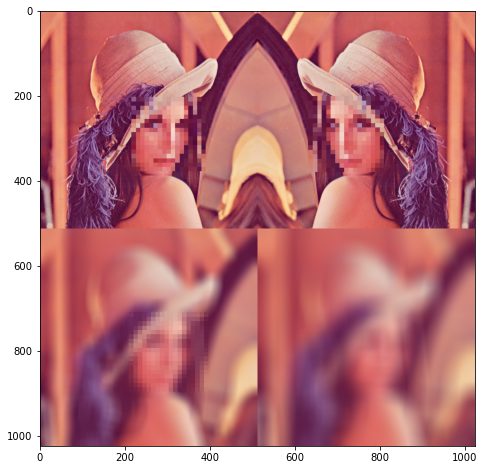

In [28]:
# 縮小時の倍率
mosaic_ratio = 0.1

new_img2 = org_img.copy()
for rect in facerect:
    x, y, dx, dy = rect

    # 該当領域切り出し
    target_area = new_img2[y:y+dy, x:x+dx]
    # 縮小
    smalled = cv2.resize(target_area, (int(dx * mosaic_ratio), int(dy * mosaic_ratio)))
    # 拡大
    mosaic = cv2.resize(smalled, (dx, dy), interpolation=cv2.INTER_NEAREST)
    # 元の画像にはめ込む
    new_img2[y:y+dy, x:x+dx] = mosaic

ax = get_ax(1, 1, (8, 8))
my_imshow(new_img2, ax[0])


### ダメージ補修

　画像に入った傷やノイズを除去します。

　修復には、cv2.inpaint()を使います。cv2.inpaint()は指定された画素を、その周りの画素を使って修復します。

　修正対象の画素を指定するためにマスクを作る必要があります。マスクは0以外の値が入っている画素だけが修復対象を表すようにします。
傷の状態によってマスク作成には色々な手法が考えられますが、ここでは cv2.threshold()を使って白傷を修復するためのマスクを作ります。


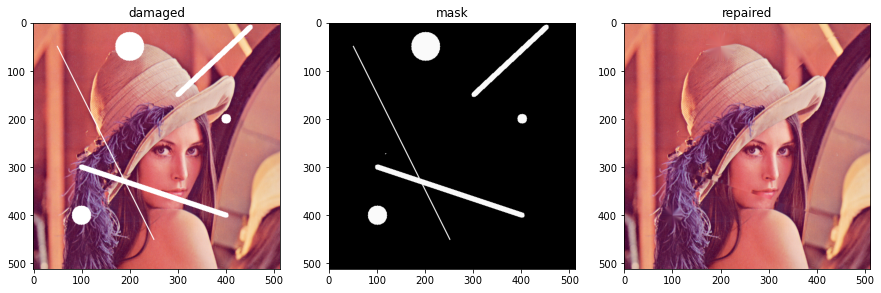

In [29]:
# オリジナル画像に白い傷をいれて、修復前の画像とする。
damaged = lena_img.copy()
cv2.line(damaged, (50, 50), (250, 450), (255, 255, 255), 2)
cv2.line(damaged, (300, 150), (450, 10), (255, 255, 255), 10)
cv2.line(damaged, (100, 300), (400, 400), (255, 255, 255), 10)
cv2.circle(damaged, (400, 200), 10, (255, 255, 255), -1)
cv2.circle(damaged, (100, 400), 20, (255, 255, 255), -1)
cv2.circle(damaged, (200, 50), 30, (255, 255, 255), -1)
#cv2.circle(damaged, (260, 260), 15, (255, 255, 255), -1)

# マスク作成
msk = cv2.cvtColor(damaged, cv2.COLOR_BGR2GRAY)
ret, msk = cv2.threshold(msk, 240, 250, cv2.THRESH_BINARY)

# 修復
# cv2.inpaint(image, mask, 修復される点回りの円の半径, 修復方法を表すフラグ)
repaired = cv2.inpaint(damaged, msk, 1, cv2.INPAINT_TELEA)

ax = get_ax(1, 3, (15, 7))
my_imshow(damaged, ax[0], 'damaged')
my_imshow(msk, ax[1], 'mask')
my_imshow(repaired, ax[2], 'repaired')